In [5]:
import numpy as np
import random

import math
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import hermite
from scipy.constants import c, h, k

import sympy as sp
from sympy import I

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

import sys
sys.path.append('./../../')  # Add the parent directory to Python path
from plot_utils import *

# Ray Optics

## Resonator stability

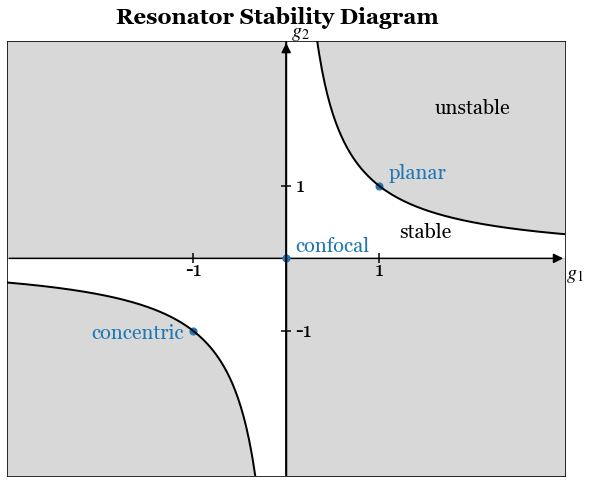

In [197]:
# Define the range for g1 and g2
g1 = np.linspace(-3, 3, 400)
g2 = np.linspace(-3, 3, 400)
G1, G2 = np.meshgrid(g1, g2)

# Define the stability condition (g1*g2 < 1)
stability_condition = G1 * G2 < 1

fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

ax.contourf(G1, G2, stability_condition, levels=[-1, 0, 1], 
            colors=[tableau_colors[7], 'white'], alpha=0.3)
ax.plot(g1, 1/g1, color='black', linewidth=2)

ax.text(2, 2, 'unstable', ha='center', fontdict=font)
ax.text(1.5, 0.3, 'stable', ha='center', fontdict=font)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])


# Fill second, fourth quadrants
ax.fill_between(g1, -3, 0, where=(g2 >= 0), color=tableau_colors[7], alpha=0.3)
ax.fill_between(g1, 0, 3, where=(g2 <= 0), color=tableau_colors[7], alpha=0.3)

# Plot the arrow
arrow_x = FancyArrowPatch((0, -3), (0, 3), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1.5, color='black')
arrow_y = FancyArrowPatch((-3, 0), (3, 0), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1.5, color='black')
ax.add_patch(arrow_x)
ax.add_patch(arrow_y)

# Create a scatter plot with ticks at (-1, 0) and (1, 0)
plt.scatter([-1, 1], [0, 0], color='black', marker='|', s=100)
plt.scatter([0, 0], [-1, 1], color='black', marker='_', s=100)

# Add labels to the ticks
ax.text(-1, -0.03, '-1', ha='center', va='top', fontdict=font)
ax.text(1, -0.03, '1', ha='center', va='top', fontdict=font)
ax.text(0.1, -1,  '-1', ha='left', va='center', fontdict=font)
ax.text(0.1, 1, '1', ha='left', va='center', fontdict=font)
ax.text(0.15, 3.25, r'$g_2$', ha='center', va='top', fontdict=font)
ax.text(3.1, -0.1, r'$g_1$', ha='center', va='top', fontdict=font)

# Plot key points and their labels
key_points = [(1, 1), (0, 0), (-1, -1)]
labels = ['planar', 'confocal', 'concentric']
label_pos = [(1.1, 1.1), (0.1, 0.1), (-1.1, -1.1)]

for point, label, label_p in zip(key_points, labels, label_pos):
    plt.scatter(*point, color=tableau_colors[0], s=50)
    ax.text(label_p[0], label_p[1], label, ha='right' if point[0] < 0 else 'left', fontdict=font, color=tableau_colors[0])

plt.gcf().set_facecolor('white')
fig.suptitle('Resonator Stability Diagram', fontproperties=suptitle_font, y=0.94)

# Show the plot
# plt.savefig('../plots/stability_diagram.png', bbox_inches='tight')
# plt.savefig('../plots/stability_diagram.pdf', bbox_inches='tight')
plt.show()

## Waist Size for Symmetric Cavity

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1104/3951651424.py:4: RuntimeWarning: divide by zero encountered in divide
  w0 = np.sqrt(np.sqrt((1 + g) / (4 * (1 - g))))
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1104/3951651424.py:5: RuntimeWarning: divide by zero encountered in divide
  w1 = np.sqrt(np.sqrt(1 / (1 - g ** 2)))


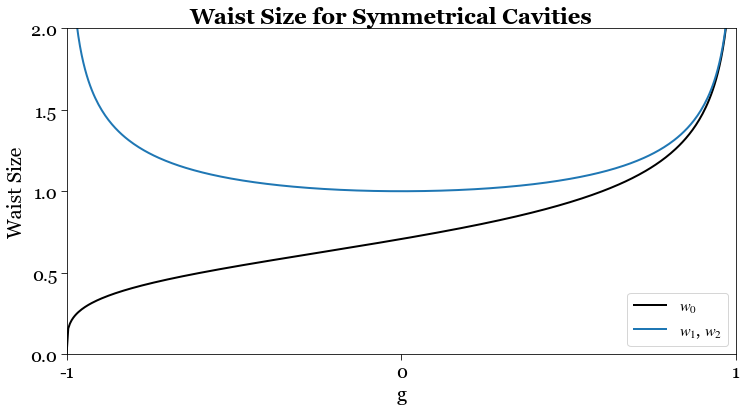

In [202]:
# Define the range for g1 and g2
g = np.linspace(-1, 1, 400)

w0 = np.sqrt(np.sqrt((1 + g) / (4 * (1 - g))))
w1 = np.sqrt(np.sqrt(1 / (1 - g ** 2)))

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(g, w0, color='black', linewidth=2, label=r'$w_0$')
ax.plot(g, w1, color=tableau_colors[0], linewidth=2, label=r'$w_1$, $w_2$')

ax.set_xlabel('g', fontdict=font)
ax.set_ylabel('Waist Size', fontdict=font)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)

plt.gcf().set_facecolor('white')
fig.suptitle('Waist Size for Symmetrical Cavities', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/waist_size.png', bbox_inches='tight')
# plt.savefig('../plots/waist_size.pdf', bbox_inches='tight')
plt.show()

# Gaussian Beams

## Beam Waist

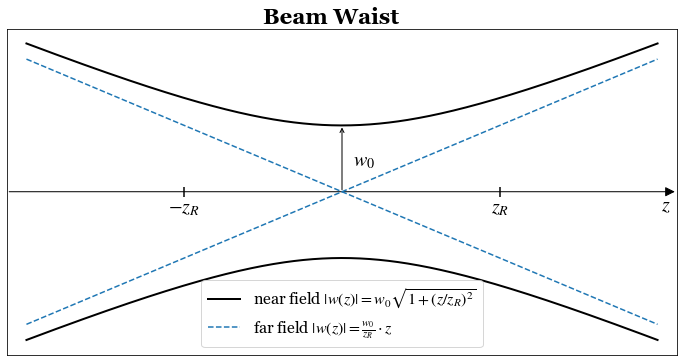

In [96]:
# Define constants
w0 = 0.3  # beam waist at focus
z0 = 2 * np.pi * w0**2 / 0.4  # Rayleigh length, last factor is wavelength arbitrary for plotting
tan_theta = w0 / z0

# Define the function
def w(z, w0, z0):
    return w0 * np.sqrt(1 + (z / z0)**2)

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

zs = np.linspace(-2*z0, 2*z0, 400)
w1 = w(zs, w0, z0)
w2 = -w1

# Plotting the curved lines
ax.plot(zs, w1, color='black', linewidth=2, label=r'near field $|w(z)| = w_0 \sqrt{1+ (z/z_R)^2}$')
ax.plot(zs, w2, color='black', linewidth=2)

# Plotting the dotted lines
ax.plot(zs, tan_theta * zs, linestyle='--', color=tableau_colors[0], label=r'far field $|w(z)| = \frac{w_0}{z_R} \cdot z$')
ax.plot(zs, -tan_theta * zs, linestyle='--', color=tableau_colors[0])

# Annotate w0 with arrow
ax.annotate('', xy=(0, w0), xytext=(0, 0), arrowprops=dict(arrowstyle='->'))

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-3, 3)
# ax.set_ylim(-0.5, 0.5)
ax.set_xticks([])
ax.set_yticks([])

# Plot the arrow
arrow_x = FancyArrowPatch((-3, 0), (3, 0), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
ax.add_patch(arrow_x)

# Create a scatter plot with ticks at (-1, 0) and (1, 0)
plt.scatter([-z0, z0], [0, 0], color='black', marker='|', s=100)

# Add labels to the ticks
ax.text(-z0, -0.03, r'$-z_R$', ha='center', va='top', fontdict=font)
ax.text(z0, -0.03, r'$z_R$', ha='center', va='top', fontdict=font)
ax.text(0.2, 0.18, r'$w_0$', ha='center', va='top', fontdict=font)
ax.text(2.9, -0.02, r'$z$', ha='center', va='top', fontdict=font)

plt.gcf().set_facecolor('white')
fig.suptitle('Beam Waist', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/beam_waist.png', bbox_inches='tight')
# plt.savefig('../plots/beam_waist.pdf', bbox_inches='tight')
plt.show()

## Hermite-Gaussian Mode 1D

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1104/2750329784.py:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term1 = np.sqrt(2 / np.pi) ** 0.25 / np.sqrt(2**l * np.math.factorial(l) * w0)


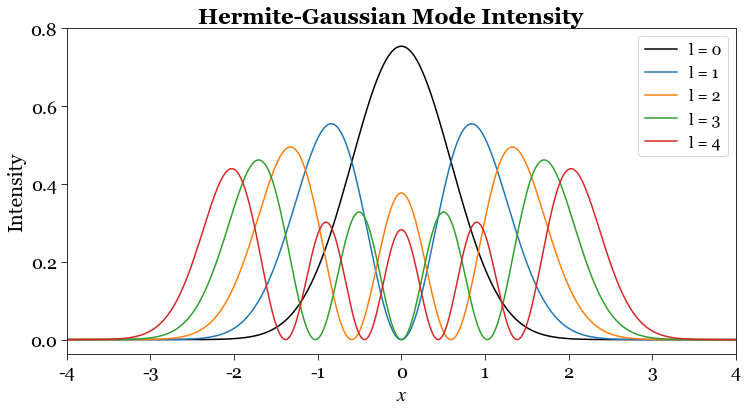

In [3]:
from scipy.special import hermite

# Constants
E0 = 1.0  # Amplitude
w0 = 1.0  # Beam waist at focus
k = 2 * np.pi / 0.4  # Wave number, assuming wavelength = 0.4 (arbitrary)
z = 5.0  # Arbitrary z position
x = np.linspace(-5, 5, 500)  # Range of x values

# Define q-parameter
q0 = 1j * np.pi * w0**2 / 0.4
qz = q0 + z
wz = w0 * np.sqrt(1 + (z / (np.pi * w0**2 / 0.4))**2)

# Function to calculate E_{l}^{(+)}(x, z)
def E_l_plus(x, z, l):
    Hl = hermite(l)  # Hermite polynomial of degree l
    term1 = np.sqrt(2 / np.pi) ** 0.25 / np.sqrt(2**l * np.math.factorial(l) * w0)
    term2 = np.sqrt(q0 / qz)
    term3 = (q0 / q0.conjugate() * qz.conjugate() / qz) ** (l / 2)
    term4 = Hl(np.sqrt(2) * x / wz)
    term5 = np.exp(-1j * k * x**2 / (2 * qz))
    return E0 * term1 * term2 * term3 * term4 * term5

def weff(l):
    return w0 * np.sqrt(1 + l)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
l_values = range(5)  # Range of l values to plot

for l in l_values:
    E_l = E_l_plus(x, z, l)
    intensity = np.abs(E_l)**2  # Calculate intensity
    if l == 0:
        ax.plot(x, intensity, label=f'l = {l}', color='black', linewidth=1.5)
    else:
        ax.plot(x, intensity, label=f'l = {l}', color=tableau_colors[l-1], linewidth=1.5)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-4, 4)
ax.set_xticks([i for i in range(-4, 5)])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.set_xlabel(r'$x$', fontdict=font)
ax.set_ylabel('Intensity', fontdict=font)
ax.legend(loc='upper right', prop=legend_font)

# fig.suptitle('Hermite-Gaussian Mode Intensity', fontproperties=suptitle_font, y=0.95)
plt.gcf().set_facecolor('white')
fig.suptitle('Hermite-Gaussian Mode Intensity', fontproperties=suptitle_font, y=0.93)

# Show the plot
# plt.savefig('../plots/hermite_gauss.png', bbox_inches='tight')
# plt.savefig('../plots/hermite_gauss.pdf', bbox_inches='tight')
plt.show()

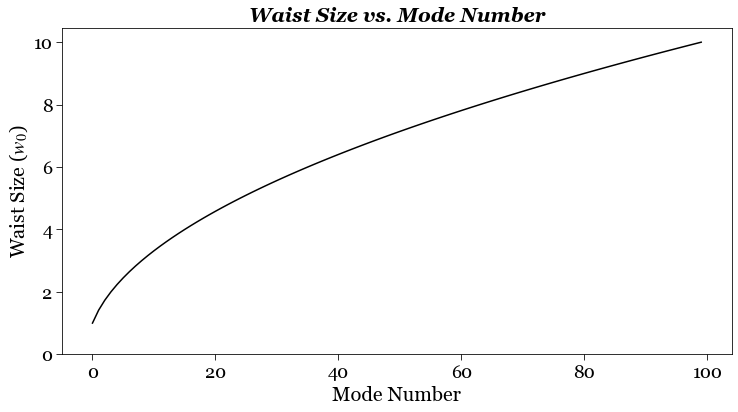

In [89]:
from scipy.special import hermite

# Constants
w0 = 1.0  # Beam waist at focus

def weff(l):
    return w0 * np.sqrt(1 + l)

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(range(100), [weff(l) for l in range(100)], color='black', linewidth=1.5)

ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xticks([20 * i for i in range(6)])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticks([i for i in range(11) if i % 2 == 0])
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.set_title('Waist Size vs. Mode Number', fontdict=title_font)
ax.set_xlabel('Mode Number', fontdict=font)
ax.set_ylabel(r'Waist Size ($w_0$)', fontdict=font)

# fig.suptitle('Hermite-Gaussian Mode Intensity', fontproperties=suptitle_font, y=0.95)
plt.gcf().set_facecolor('white')

# Show the plot
# plt.savefig('../plots/hermite_gauss_waist.png', bbox_inches='tight')
# plt.savefig('../plots/hermite_gauss_waist.pdf', bbox_inches='tight')
plt.show()

## Hermite-Gaussian Mode l=100

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1104/3070188222.py:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term1 = np.sqrt(2 / np.pi) ** 0.25 / np.sqrt(2**l * np.math.factorial(l) * w0)


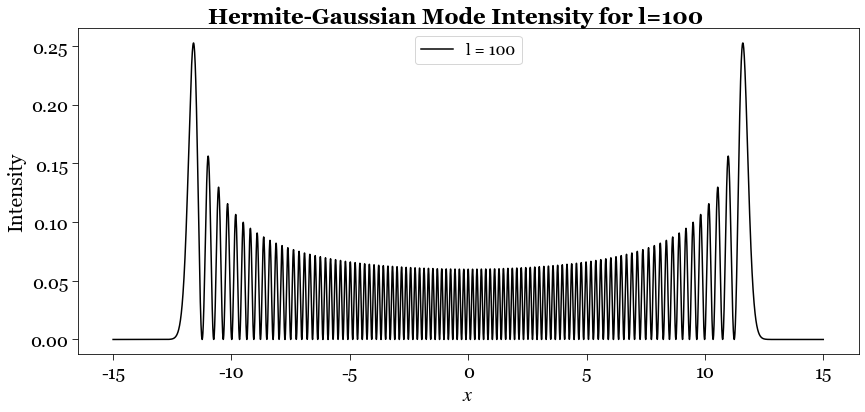

In [40]:


# Constants
E0 = 1.0  # Amplitude
w0 = 1.0  # Beam waist at focus
k = 2 * np.pi / 0.4  # Wave number, assuming wavelength = 0.4 (arbitrary)
z = 5.0  # Arbitrary z position
x = np.linspace(-15, 15, 5000)  # Range of x values

# Define q-parameter
q0 = 1j * np.pi * w0**2 / 0.4
qz = q0 + z
wz = w0 * np.sqrt(1 + (z / (np.pi * w0**2 / 0.4))**2)

# Function to calculate E_{l}^{(+)}(x, z)
def E_l_plus(x, z, l):
    Hl = hermite(l)  # Hermite polynomial of degree l
    term1 = np.sqrt(2 / np.pi) ** 0.25 / np.sqrt(2**l * np.math.factorial(l) * w0)
    term2 = np.sqrt(q0 / qz)
    term3 = (q0 / q0.conjugate() * qz.conjugate() / qz) ** (l / 2)
    term4 = Hl(np.sqrt(2) * x / wz)
    term5 = np.exp(-1j * k * x**2 / (2 * qz))
    return E0 * term1 * term2 * term3 * term4 * term5

def weff(l):
    return w0 * np.sqrt(1 + l)

# Plotting
fig = plt.figure(figsize=(14, 6))
ax = plt.gca()
l_values = [100]

for l in l_values:
    E_l = E_l_plus(x, z, l)
    intensity = np.abs(E_l)**2  # Calculate intensity
    ax.plot(x, intensity, label=f'l = {l}', color='black', linewidth=1.5)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_xlim(-4, 4)
ax.set_xticks([-15, -10, -5, 0, 5, 10, 15])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticks([0.05 * i for i in range(6)])
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))  # Format y-tick labels to 2 decimal places
ax.set_yticklabels([f'{0.05 * i:.2f}' for i in range(6)], fontdict=tick_font)
ax.set_xlabel(r'$x$', fontdict=font)
ax.set_ylabel('Intensity', fontdict=font)
ax.legend(loc='upper center', prop=legend_font)

# fig.suptitle('Hermite-Gaussian Mode Intensity', fontproperties=suptitle_font, y=0.95)
plt.gcf().set_facecolor('white')
fig.suptitle('Hermite-Gaussian Mode Intensity for l=100', fontproperties=suptitle_font, y=0.93)

# Show the plot
# plt.savefig('../plots/hermite_gauss_n100.png', bbox_inches='tight')
# plt.savefig('../plots/hermite_gauss_n100.pdf', bbox_inches='tight')
plt.show()

## Transverse Mode Spacing

In [3]:
FSR = 20
omega_transverse = 1
qs = [FSR * i for i in range(-1, 2)]
print(qs)

[-20, 0, 20]


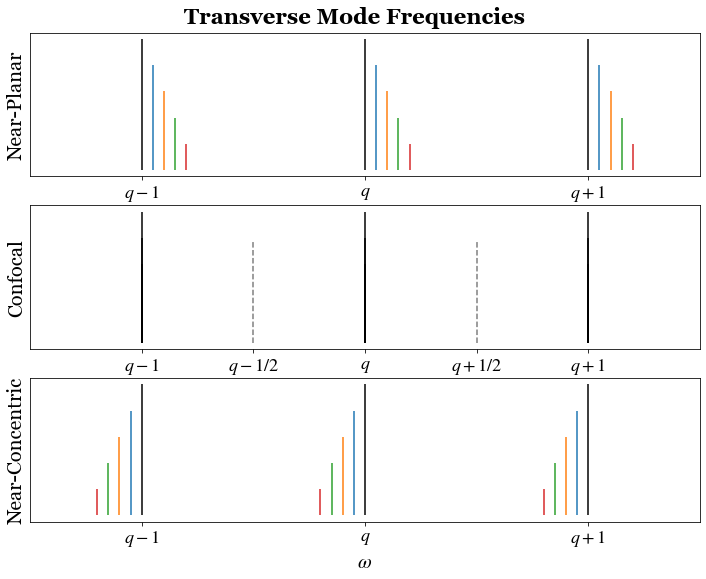

In [42]:
# Define constants
FSR = 20
omega_transverse = 1

qs = [FSR * i for i in range(-1, 2)]
heights = [5 - i for i in range(5)]
xs = [[i for i in range(6)], [0 for i in range(6)], [-i for i in range(16)]]
colors = ['black', tableau_colors[0], tableau_colors[1], tableau_colors[2], tableau_colors[3]]
ymin = [0 for i in range(5)]
ymax = [5 - i for i in range(5)]
indices = [0, 1, 2, 3, 4]

titles = ['Near-Planar', 'Confocal', 'Near-Concentric']


# fig = plt.figure(figsize=(12, 6))
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
# axs = plt.gca()

for i, ax in enumerate(axs):
    for q in qs:
        for xpos, ymin_val, ymax_val, color, ind in zip(xs[i], ymin, ymax, colors, indices):
            if i == 1:
                color = 'black'
            new_xpos = xpos + q
            ax.vlines(x=new_xpos, ymin=ymin_val, ymax=ymax_val, color=color)
    if i == 1:
        ax.vlines(x=-10, ymin=ymin_val, ymax=3.9, color=tableau_colors[7], linestyle='--')
        ax.vlines(x=10, ymin=ymin_val, ymax=3.9, color=tableau_colors[7], linestyle='--')

    # Customize tick sizes
    # axs[0].tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    ax.set_xlim(-30, 30)
    # ax.set_ylim(-0.5, 0.5)
    xticks = [-20, 0, 20]
    xtick_labels = ['$q-1$', '$q$', '$q+1$']
    if i == 1:
        xticks = [-20, -10, 0, 10, 20]
        xtick_labels = ['$q-1$', '$q-1/2$', '$q$', '$q+1/2$', '$q+1$']
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, fontdict=tick_font)
    ax.set_yticks([])

    ax.set_xlabel('$\omega$', fontdict=font)
    ax.set_ylabel(titles[i], fontdict=font)

# Add labels to the ticks
plt.gcf().set_facecolor('white')
fig.suptitle('Transverse Mode Frequencies', fontproperties=suptitle_font, y=0.92)
# plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/transverse_mode_spacing.png', bbox_inches='tight')
# plt.savefig('../plots/transverse_mode_spacing.pdf', bbox_inches='tight')
plt.show()

## Rb Spectroscopy

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_5203/3527905702.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


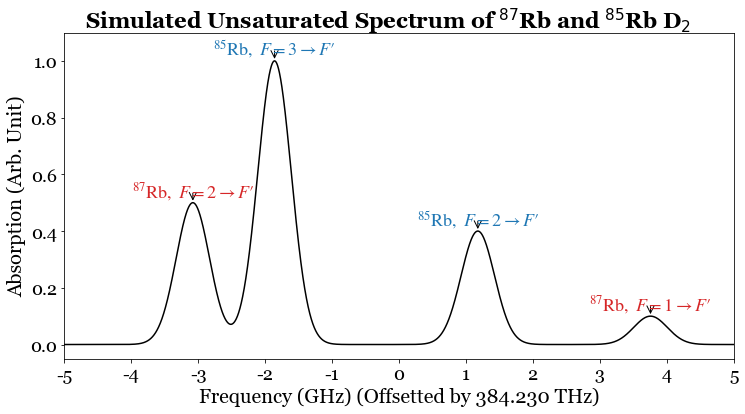

In [22]:
# Constants
doppler_width = 250e6  # Doppler width in Hz
natural_linewidth = 5e6  # Natural linewidth in Hz
splitting_87 = 6.8e9  # 87Rb hyperfine splitting in Hz
splitting_85 = 3.0e9  # 85Rb hyperfine splitting in Hz
temperature = 300  # Room temperature in Kelvin

# Frequencies for the transitions (in Hz)
# These are arbitrary values for the sake of simulation
# 780 nm transition corresponds to approximately 384.23 THz
# transitions_87 = np.array([384.230e12, 384.2368e12])
# transitions_85 = np.array([384.228e12, 384.231e12])
transitions_87 = np.array([384.2304844685e12 - 2.56300597908911e9, 
                           384.2304844685e12 + 4.27167663181519e9])
transitions_85 = np.array([384.230406373e12 - 1.2648885163e9,
                           384.230406373e12 + 1.7708439228e9])

matrix_87 = np.array([0.5, 0.1])
matrix_85 = np.array([1, 0.4])

# Gaussian function for Doppler broadening
def gaussian(x, center, width):
    return np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Lorentzian function for natural linewidth
def lorentzian(x, center, width):
    return width / (2 * np.pi * ((x - center) ** 2 + (width / 2) ** 2))

# Generate frequency range for the plot
freq_range = np.linspace(384.226e12, 384.236e12, 10000)

# Simulate the Doppler-broadened absorption lines
absorption_87 = np.zeros_like(freq_range)
absorption_85 = np.zeros_like(freq_range)

for i, f in enumerate(transitions_87):
    # absorption_87 += gaussian(freq_range, f, doppler_width) * lorentzian(freq_range, f, natural_linewidth)
    absorption_87 += gaussian(freq_range, f, doppler_width) * matrix_87[i]

for i, f in enumerate(transitions_85):
    # absorption_85 += gaussian(freq_range, f, doppler_width) * lorentzian(freq_range, f, natural_linewidth)
    absorption_85 += gaussian(freq_range, f, doppler_width) * matrix_85[i]

# Combine the two isotopes
total_absorption = absorption_87 + absorption_85

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(freq_range, total_absorption, label='Unsaturated Absorption Spectrum', color='black')

def combined_formatter(x, pos):
    offset = 3.84231e14 # Example offset
    adjusted_value = (x - offset) / 1e9
    return f'{adjusted_value:.0f}'

# Set the formatter for the x-axis
x_ticks = np.arange(-5, 6, 1)  # Adjust the range as needed
ax.set_xticks((x_ticks * 1e9) + 3.84231e14)  # Apply the offset

ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(combined_formatter))
ax.set_xlabel(f'Frequency (GHz) (Offsetted by 384.230 THz)', fontdict=font)
ax.set_xlim((-5 * 1e9) + 3.84231e14, (5 * 1e9) + 3.84231e14)

ax.set_ylim(-0.05, 1.1)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}'))  # Format y-tick labels to 2 decimal places
ax.set_ylabel('Absorption (Arb. Unit)', fontdict=font)

# Annotate the peaks
peak_labels = [
    (r'$^{87}\text{Rb},\ F=2 \rightarrow F \prime$', transitions_87[0], 0.5),
    (r'$^{85}\text{Rb},\ F=3 \rightarrow F \prime$', transitions_85[0], 1),
    (r'$^{85}\text{Rb},\ F=2 \rightarrow F \prime$', transitions_85[1], 0.4),
    (r'$^{87}\text{Rb},\ F=1 \rightarrow F \prime$', transitions_87[1], 0.1)
]

for i, (label, x_pos, y_pos) in enumerate(peak_labels):
    if i == 0 or i == 3:
        ax.annotate(label, xy=(x_pos, y_pos), xytext=(x_pos, y_pos+0.02),
                    arrowprops=dict(facecolor=tableau_colors[3], arrowstyle='->'),
                    horizontalalignment='center', fontproperties=annotation_font,
                    color=tableau_colors[3])
    else:
        ax.annotate(label, xy=(x_pos, y_pos), xytext=(x_pos, y_pos+0.02),
                    arrowprops=dict(facecolor=tableau_colors[0], arrowstyle='->'),
                    horizontalalignment='center', fontproperties=annotation_font,
                    color=tableau_colors[0])
    
# Plot the unsaturated spectrum
fig.suptitle('Simulated Unsaturated Spectrum of $^{87}$Rb and $^{85}$Rb D$_2$', fontproperties=suptitle_font, y=0.94)
# plt.legend()
# plt.savefig('../plots/Rb_spectrum.png', bbox_inches='tight')
# plt.savefig('../plots/Rb_spectrum.pdf', bbox_inches='tight')
plt.show()


# Quantum Optics

## Doppler Cooling

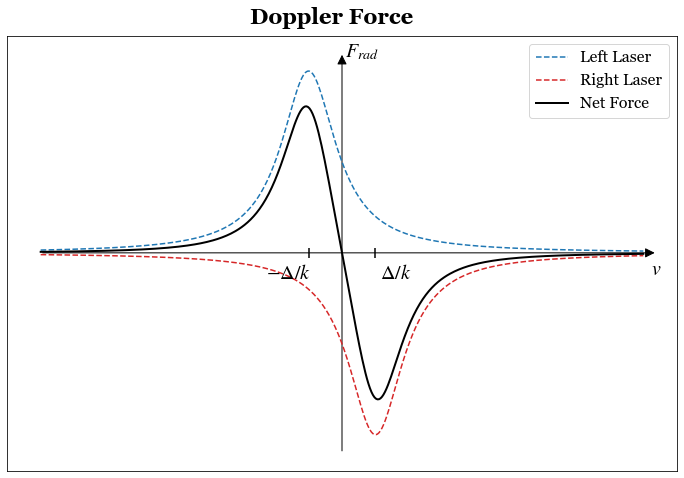

In [4]:
from matplotlib.patches import FancyArrowPatch

# Define constants
gamma = 1
Delta = -gamma / 2
k = 1


# Define the function
def F_1(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1)

def F_2(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (- term2)

def F_rad(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1 - term2)

fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

vs = np.linspace(-4.5, 4.5, 400)
F_1s = F_1(vs, Delta, k, gamma)
F_2s = F_2(vs, Delta, k, gamma)
F_rads = F_rad(vs, Delta, k, gamma)
ax.plot(vs, F_1s, label='Left Laser', 
            color=tableau_colors[0], linewidth=1.5, linestyle='--')
ax.plot(vs, F_2s, label='Right Laser', 
            color=tableau_colors[3], linewidth=1.5, linestyle='--')
ax.plot(vs, F_rads, label='Net Force', 
            color='black', linewidth=2)
    

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-5, 5)
# ax.set_ylim(-0.5, 0.5)
ax.set_xticks([])
ax.set_yticks([])

# Plot the arrow
arrow_x = FancyArrowPatch((0, -0.55), (0, 0.55), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
arrow_y = FancyArrowPatch((-4.5, 0), (4.7, 0), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
ax.add_patch(arrow_x)
ax.add_patch(arrow_y)

# Create a scatter plot with ticks at (-1, 0) and (1, 0)
plt.scatter([-0.5, 0.5], [0, 0], color='black', marker='|', s=100)

# Add labels to the ticks
ax.text(-0.8, -0.03, r'$-\Delta/k$', ha='center', va='top', fontdict=font)
ax.text(0.8, -0.03, r'$\Delta/k$', ha='center', va='top', fontdict=font)
ax.text(0.3, 0.58, r'$F_{rad}$', ha='center', va='top', fontdict=font)
ax.text(4.7, -0.02, r'$v$', ha='center', va='top', fontdict=font)

plt.gcf().set_facecolor('white')
fig.suptitle('Doppler Force', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/doppler_force.png', bbox_inches='tight')
# plt.savefig('../plots/doppler_force.pdf', bbox_inches='tight')
plt.show()

## Rabi, resonant

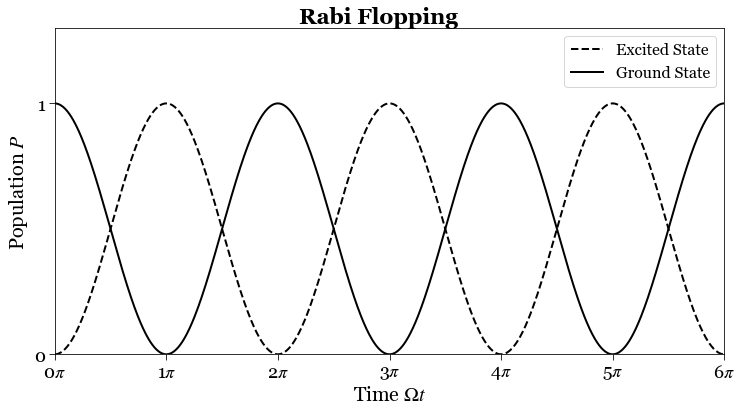

In [4]:
# Define constants
Rabi = 1

# Zeroth-order spectrum, just Doppler broadening
def P_g(t):
    return 0.5 * (1 + np.cos(Rabi * t))

def P_e(t):
    return 0.5 * (1 - np.cos(Rabi * t))

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ts = np.linspace(0, 6 * np.pi, 1000)
P_es = [P_e(t) for t in ts]
P_gs = [P_g(t) for t in ts]
ax.plot(ts, P_es, label='Excited State', 
            color='black', linewidth=2, linestyle='--')
ax.plot(ts, P_gs, label='Ground State', 
            color='black', linewidth=2)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 6 * np.pi)
ax.set_ylim(0, 1.3)
ax.set_xticks([x * np.pi for x in range(7)])
ax.set_yticks([0, 1])
ax.set_xticklabels([str(x) + r'$\pi$' for x in range(7)], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Time ' + r'$\Omega t$', fontdict=font)
plt.ylabel('Population ' + r'$P$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Rabi Flopping', fontproperties=suptitle_font, y=0.93)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=legend_font)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('your_figure.png', bbox_inches='tight')

# plt.savefig('../plots/rabi_flopping.png', bbox_inches='tight')
# plt.savefig('../plots/rabi_flopping.pdf', bbox_inches='tight')
plt.show()

## Rabi, weak/ strong

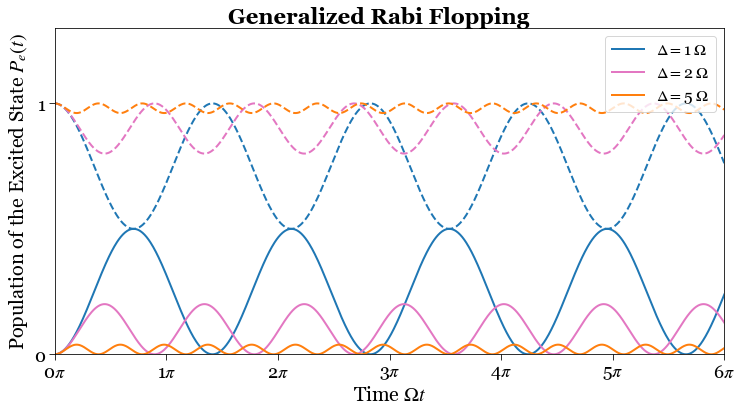

In [19]:
# Define constants
Rabi = 1

def P_e(t, Delta):
    Rabi_eff = np.sqrt(Rabi**2 + Delta**2)
    factor = Rabi**2 / Rabi_eff**2
    return factor * 0.5 * (1 - np.cos(Rabi_eff * t))


fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

Deltas = np.array([1, 2, 5]) * Rabi
ts = np.linspace(0, 6 * np.pi, 1000)
colors = [tableau_colors[0], tableau_colors[6], tableau_colors[1]]
for i, Delta in enumerate(Deltas):
    P_es = [P_e(t, Delta) for t in ts]
    P_gs = [1 - P_e(t, Delta) for t in ts]
    ax.plot(ts, P_es, label=r'$\Delta = $' + f'{Delta}' + r' $\Omega$',
                color=colors[i], linewidth=2)
    ax.plot(ts, P_gs, linestyle='--',
                color=colors[i], linewidth=2)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 6 * np.pi)
ax.set_ylim(0, 1.3)
ax.set_xticks([x * np.pi for x in range(7)])
ax.set_yticks([0, 1])
ax.set_xticklabels([str(x) + r'$\pi$' for x in range(7)], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Time ' + r'$\Omega t$', fontdict=font)
plt.ylabel('Population of the Excited State ' + r'$P_e(t)$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Generalized Rabi Flopping', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/rabi_detunings.png', bbox_inches='tight')
# plt.savefig('../plots/rabi_detunings.pdf', bbox_inches='tight')
plt.show()

## Avoided Crossing

In [21]:
# Define symbols
Omega, Delta = sp.symbols('Omega Delta')

# Define the matrix
H = sp.Matrix([[0, Omega/2], [Omega/2, -Delta]])

# Calculate eigenvalues and eigenvectors
eigenvalues = H.eigenvals()
eigenvectors = H.eigenvects()

# Display results
print("Eigenvalues:")
for eigenvalue, multiplicity in eigenvalues.items():
    print(f"  {eigenvalue}: multiplicity {multiplicity}")

print("\nEigenvectors:")
for eigenvector in eigenvectors:
    eigval = eigenvector[0]
    mult = eigenvector[1]
    eigvec = eigenvector[2][0]
    print(f"Eigenvalue: {eigval}, Multiplicity: {mult}, Eigenvector: {eigvec}")

Eigenvalues:
  -Delta/2 - sqrt(Delta**2 + Omega**2)/2: multiplicity 1
  -Delta/2 + sqrt(Delta**2 + Omega**2)/2: multiplicity 1

Eigenvectors:
Eigenvalue: -Delta/2 - sqrt(Delta**2 + Omega**2)/2, Multiplicity: 1, Eigenvector: Matrix([[2*Delta/Omega + 2*(-Delta/2 - sqrt(Delta**2 + Omega**2)/2)/Omega], [1]])
Eigenvalue: -Delta/2 + sqrt(Delta**2 + Omega**2)/2, Multiplicity: 1, Eigenvector: Matrix([[2*Delta/Omega + 2*(-Delta/2 + sqrt(Delta**2 + Omega**2)/2)/Omega], [1]])


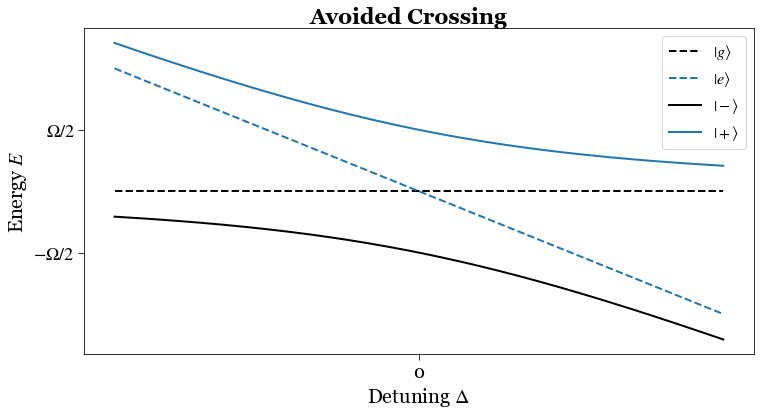

In [54]:
# Define the range for Delta
Delta = np.linspace(-1, 1, 400)
Rabi = 1

# Bare energy levels
Eg_bare = np.zeros_like(Delta)
Ee_bare = -Delta

# Stark-shifted energy levels
Eg_stark = (-Delta - np.sqrt(Rabi**2 + Delta**2)) * 0.5
Ee_stark = (-Delta + np.sqrt(Rabi**2 + Delta**2)) * 0.5


fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(Delta, Eg_bare, color='black', linewidth=2, linestyle='--',label=r'$|g\rangle$')
ax.plot(Delta, Ee_bare, color=tableau_colors[0], linewidth=2, linestyle='--', label=r'$|e\rangle$')
ax.plot(Delta, Eg_stark, color='black', linewidth=2, label=r'$|-\rangle$')
ax.plot(Delta, Ee_stark, color=tableau_colors[0], linewidth=2,  label=r'$|+\rangle$')

# ax.plot(g, w0, color='black', linewidth=2, label=r'$w_0$')
# ax.plot(g, w1, color=tableau_colors[0], linewidth=2, label=r'$w_1$, $w_2$')

ax.set_xlabel('Detuning $\Delta$', fontdict=font)
ax.set_ylabel('Energy $E$', fontdict=font)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_xlim(-1, 1)
# ax.set_ylim(0, 2)
ax.set_xticks([0])
ax.set_yticks([-0.5, 0.5])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(['$-\Omega/2$', '$\Omega/2$'], fontdict=tick_font)

plt.gcf().set_facecolor('white')
fig.suptitle('Avoided Crossing', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/avoided_crossing.png', bbox_inches='tight')
# plt.savefig('../plots/avoided_crossing.pdf', bbox_inches='tight')
plt.show()

## Scattering

In [6]:
# Define symbols
Omega, Delta, Gamma = sp.symbols('Omega Delta Gamma')

# Define the matrix
H = sp.Matrix([[0, Omega/2], [Omega/2, -Delta+I*Gamma/2]])

# Calculate eigenvalues and eigenvectors
eigenvalues = H.eigenvals()
eigenvectors = H.eigenvects()

# Display results
print("Eigenvalues:")
for eigenvalue, multiplicity in eigenvalues.items():
    print(f"  {eigenvalue}: multiplicity {multiplicity}")

print("\nEigenvectors:")
for eigenvector in eigenvectors:
    eigval = eigenvector[0]
    mult = eigenvector[1]
    eigvec = eigenvector[2][0]
    print(f"Eigenvalue: {eigval}, Multiplicity: {mult}, Eigenvector: {eigvec}")

Eigenvalues:
  -Delta/2 + I*Gamma/4 - sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4: multiplicity 1
  -Delta/2 + I*Gamma/4 + sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4: multiplicity 1

Eigenvectors:
Eigenvalue: -Delta/2 + I*Gamma/4 - sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4, Multiplicity: 1, Eigenvector: Matrix([[(2*Delta - I*Gamma)/Omega + 2*(-Delta/2 + I*Gamma/4 - sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4)/Omega], [1]])
Eigenvalue: -Delta/2 + I*Gamma/4 + sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4, Multiplicity: 1, Eigenvector: Matrix([[(2*Delta - I*Gamma)/Omega + 2*(-Delta/2 + I*Gamma/4 + sqrt((2*Delta - I*Gamma - 2*I*Omega)*(2*Delta - I*Gamma + 2*I*Omega))/4)/Omega], [1]])


## Dipole Trap intensity

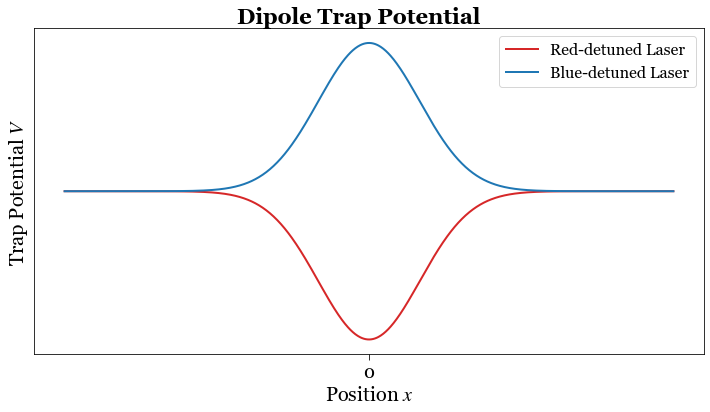

In [62]:
# Define the range for Delta
# Parameters
I_0 = 1           # Peak intensity
w_0 = 1           # Beam waist
r = np.linspace(-3 * w_0, 3 * w_0, 1000)  # Radial distance

# Gaussian intensity profile
I = I_0 * np.exp(-2 * (r ** 2) / (w_0 ** 2))

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ax.plot(r, -I, color=tableau_colors[3], linewidth=2, label='Red-detuned Laser')
ax.plot(r, I, color=tableau_colors[0], linewidth=2, label='Blue-detuned Laser')

# ax.plot(g, w0, color='black', linewidth=2, label=r'$w_0$')
# ax.plot(g, w1, color=tableau_colors[0], linewidth=2, label=r'$w_1$, $w_2$')

ax.set_xlabel('Position $x$', fontdict=font)
ax.set_ylabel('Trap Potential $V$', fontdict=font)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_xlim(-1, 1)
# ax.set_ylim(0, 2)
ax.set_xticks([0])
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)

plt.gcf().set_facecolor('white')
fig.suptitle('Dipole Trap Potential', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/dipole_trap_potential.png', bbox_inches='tight')
# plt.savefig('../plots/dipole_trap_potential.pdf', bbox_inches='tight')
plt.show()

## Power Broadening

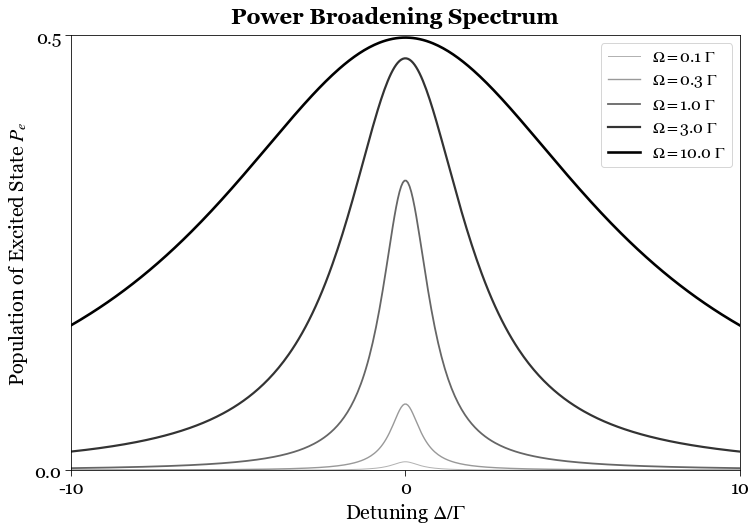

In [166]:
# Define constants
Gamma = 1

# Zeroth-order spectrum, just Doppler broadening
def rho_ee(Delta, Rabi):
    return (Rabi**2 / Gamma**2) / (1 + (2 * Delta / Gamma)**2 + 2 * (Rabi)**2 / (Gamma)**2)

fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

Deltas = np.linspace(-10, 10, 400)

# Calculate various Rabi frequency for pump powers
ratios = np.array([0.1, 0.3, 1, 3, 10])
alphas = np.array([0.3, 0.4, 0.6, 0.8, 1])
widths = 2 * np.array([0.5, 0.7, 0.9, 1.1, 1.3])

P_es = []
for i, ratio in enumerate(ratios):
    Rabi = ratio * Gamma
    P_e = [rho_ee(Delta, Rabi) for Delta in Deltas]
    P_es.append(P_e)

# Plot the result
for i in range(len(ratios)):
    ax.plot(Deltas, P_es[i], label=r'$\Omega=$' + str(ratios[i]) + r' $\Gamma$', 
            color='black', alpha=alphas[i], linewidth=widths[i])

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-10, 10)
ax.set_ylim(0, 0.5)
ax.set_xticks([-10, 0, 10])
ax.set_yticks([0, 0.5])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Customize the plot (optional)
plt.xlabel('Detuning ' + r'$\Delta/\Gamma$', fontdict=font)
plt.ylabel('Population of Excited State ' + r'$P_e$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Power Broadening Spectrum', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/power_broadening_spectrum.png')
# plt.savefig('../plots/power_broadening_spectrum.pdf')
plt.show()

## Lamb Dip

In [13]:
# Define constants
Gamma = 1
gamma_perp = Gamma / 2 # non-collisional 
kvs = np.linspace(- 5 * 10, 5 * 10, 1000)
std = 10 * Gamma

# Zeroth-order spectrum, just Doppler broadening
def S_a_0(Delta):
    integral = np.sum((2 * gamma_perp) / (gamma_perp ** 2 + (Delta + kvs) ** 2) 
                      * norm.pdf(kvs, loc=0, scale=std))
    return integral / len(kvs)  # Average over k_v values

# Next-order spectrum, includes the Lamb dip
def S_a_2(Delta):
    # Define the integrand functions
    integrand1 = -(2 * gamma_perp**2 / Gamma
                / ((gamma_perp**2 + (Delta - kvs)**2) 
                *  (gamma_perp**2 + (Delta + kvs)**2)))
    
    integrand2 = (1j * 2 * kvs / 2
                / ((gamma_perp + 1j * (Delta - kvs))
                * (Gamma - 1j * 2 * kvs)
                * (gamma_perp + 1j * (Delta - 3 * kvs))
                * (gamma_perp - 1j * (Delta + kvs))))
    
    integrand3 = -(gamma_perp - 1j * 2 * kvs
                / ((Gamma - 1j * 2 * kvs)
                * (gamma_perp + 1j * (Delta - 3 * kvs))
                * (gamma_perp - 1j * (Delta + kvs))**2))
    
    integral = np.sum((integrand1 + integrand2 + np.conj(integrand2) 
            + integrand3 + np.conj(integrand3)) * norm.pdf(kvs, loc=0, scale=std))
    
    return integral / len(kvs)  # Average over k_v values


/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_7379/1349516183.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([-20, 0, 20], fontdict=tick_font)
/var/fol

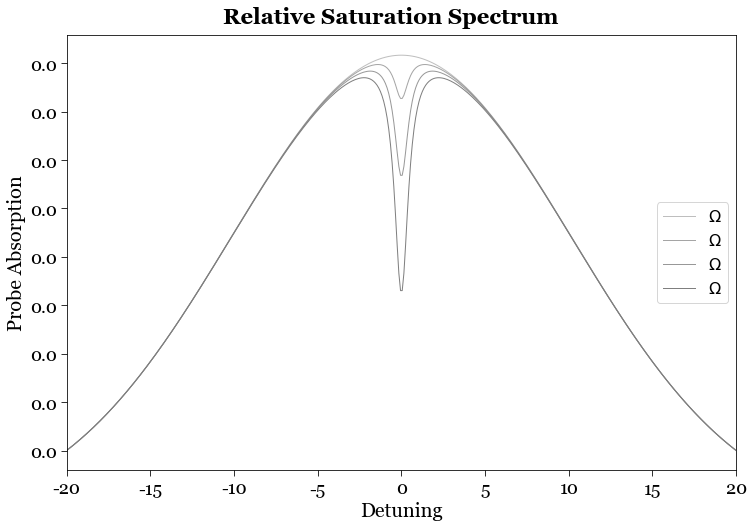

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

Deltas = np.linspace(-20, 20, 400)

# Calculate various Rabi frequency for pump powers
ratios = np.array([0, 0.3, 0.5, 0.7])
alphas = np.array([0.5, 0.7, 0.8, 1])
fudges = np.array([1, 0.9, 0.8, 0.7])
absorptions = []
for i, ratio in enumerate(ratios):
    Rabi = ratio * Gamma
    absorption = [S_a_0(Delta) + Rabi**2 * S_a_2(Delta) for Delta in Deltas]
    start = absorption[0]
    absorptions.append(absorption - start)

# Plot the result
for i in range(len(ratios)):
    ax.plot(Deltas, absorptions[i], label=r'$\Omega$', 
            color=tableau_colors[7], alpha=alphas[i], linewidth=1.0)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-20, 20)
# ax.set_ylim(0, 1.2)
ax.set_xticklabels([-20, 0, 20], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Customize the plot (optional)
plt.xlabel('Detuning', fontdict=font)
plt.ylabel('Probe Absorption', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Relative Saturation Spectrum', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='center right', prop=legend_font)

# Show the plot
# plt.savefig('./plots/optimized_transmit_energies.png')
plt.show()

## Purcell suprression

In [ ]:
# Define constants
FSR = 20
omega_transverse = 1

qs = [FSR * i for i in range(-1, 2)]
heights = [5 - i for i in range(5)]
xs = [[i for i in range(6)], [0 for i in range(6)], [-i for i in range(16)]]
colors = ['black', tableau_colors[0], tableau_colors[1], tableau_colors[2], tableau_colors[3]]
ymin = [0 for i in range(5)]
ymax = [5 - i for i in range(5)]
indices = [0, 1, 2, 3, 4]

titles = ['Near-Planar', 'Confocal', 'Near-Concentric']


# fig = plt.figure(figsize=(12, 6))
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
# axs = plt.gca()

for i, ax in enumerate(axs):
    for q in qs:
        for xpos, ymin_val, ymax_val, color, ind in zip(xs[i], ymin, ymax, colors, indices):
            if i == 1:
                color = 'black'
            new_xpos = xpos + q
            ax.vlines(x=new_xpos, ymin=ymin_val, ymax=ymax_val, color=color)
    if i == 1:
        ax.vlines(x=-10, ymin=ymin_val, ymax=3.9, color=tableau_colors[7], linestyle='--')
        ax.vlines(x=10, ymin=ymin_val, ymax=3.9, color=tableau_colors[7], linestyle='--')

    # Customize tick sizes
    # axs[0].tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
    ax.set_xlim(-30, 30)
    # ax.set_ylim(-0.5, 0.5)
    xticks = [-20, 0, 20]
    xtick_labels = ['$q-1$', '$q$', '$q+1$']
    if i == 1:
        xticks = [-20, -10, 0, 10, 20]
        xtick_labels = ['$q-1$', '$q-1/2$', '$q$', '$q+1/2$', '$q+1$']
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, fontdict=tick_font)
    ax.set_yticks([])

    ax.set_xlabel('$\omega$', fontdict=font)
    ax.set_ylabel(titles[i], fontdict=font)

# Add labels to the ticks
plt.gcf().set_facecolor('white')
fig.suptitle('Transverse Mode Frequencies', fontproperties=suptitle_font, y=0.92)
# plt.legend(loc='lower center', prop=legend_font)

# Show the plot
# plt.savefig('../plots/transverse_mode_spacing.png', bbox_inches='tight')
# plt.savefig('../plots/transverse_mode_spacing.pdf', bbox_inches='tight')
plt.show()